## Final Project Report for CS 184A/284A, Fall 2023

__Project Title:__ Fetus Health Classification
<br>
__Project Number:__ 12
<br>
<br>
__Student Name(s)__
<br>
Sharvin Joshi, 49481100, sharvimj@uci.edu
<br>
Jeffrey Wang, 83329245, jeffrw20@uci.edu

### 1. Introduction and Project Statement
Our project focuses on diagnosing the health of fetus though analyzing data gathered from feti to determine if a  fetus is infected with some sort of disease. This can potentially be helpful in early diagnoses of diseases in fetuses to prevent maternal mortality; 94% of the 295,000 deaths (as of 2017) during and following pregnancy and childbirth could have been prevented if the fetus was correctly diagnosed. Each datapoint has 21 features like heartrate, fetus movements, acceleration, and deceleration. With each datapoint, there is a diagnostic given by three experts that falls into one of three categories: normal health, are suspected of carrying disease, or are confirmed to be carrying a pathological disease; We would be predicting one of the multi-class labels base off the 2126 datapoints from Kaggle.

### 2. Related Work
On Kaggle, there have been other submissions that uses a multitude of multiclass classifier models to solve the problem including Logistic Regression, Decision Trees, Random Forest, Naive Bayes, and more. With this assorted methods of classification for this problem, we wanted to try if Knn proves to be a much too simple methodology. On top of that, we wanted to see if a Multi-layer Perceptron(MLP) would be much more accurate than Knn. 

Other previous works includes this relatively recent article "[Fetal Health Classification from Cardiotocograph for Both Stages of Labor—A Soft-Computing-Based Approach](https://www.mdpi.com/2075-4418/13/5/858)" where it also recognizes the difficulty on using cardiotocography (recording of the fetal heartbeat and the uterine contractions during pregnancy) data from the first stage and the second stage of labor. In this article, they used standard classification methods like Support Vector Machines(SVM) and Random Forest(RF) and achieved 97.5% and 98% accuracy on prediction for the first stage of labor. In second stage of labor, SVM and RF's performance became 90.6% and 89.3% respectively. Although this paper's MLP performed less well than its RF and SVM models, we wanted to try if there are other configuration of MLP with out dataset that can improve upon their performances.


### 3. Dataset
Our dataset comes from the Kaggle competition [Fetal Health Classificatoin](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification), where 2126 datapoints are given with 21 features that was classified by three experts to categorize each datapoint into one of three labels: Normal, Suspect, and Pathological.

There are quite a number of features in the dataset that isn't exactly clear to us, for instance the "histogram" it is referring to isn't explained in the Kaggle competition. So we wanted to see how relevant with their contribution to the prediction compare to other features that seem to have more relevance on the surface level: features like heart rates, acceleration, and deceleration.
<br><br>
Moreover, we discovered an important fact of our dataset: it is an imbalanced dataset which most of the datapoints being labeled as "normal." This is an interesting point that may skew the result of our machine learning model toward predicting mostly "Normal"
#### Here are some graphical representation for all features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\jeffr\\Desktop\\CS184A\\Project\\FetusHealthML\\Project\\fetal_health.csv")
display(df)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#### Histograms of all features

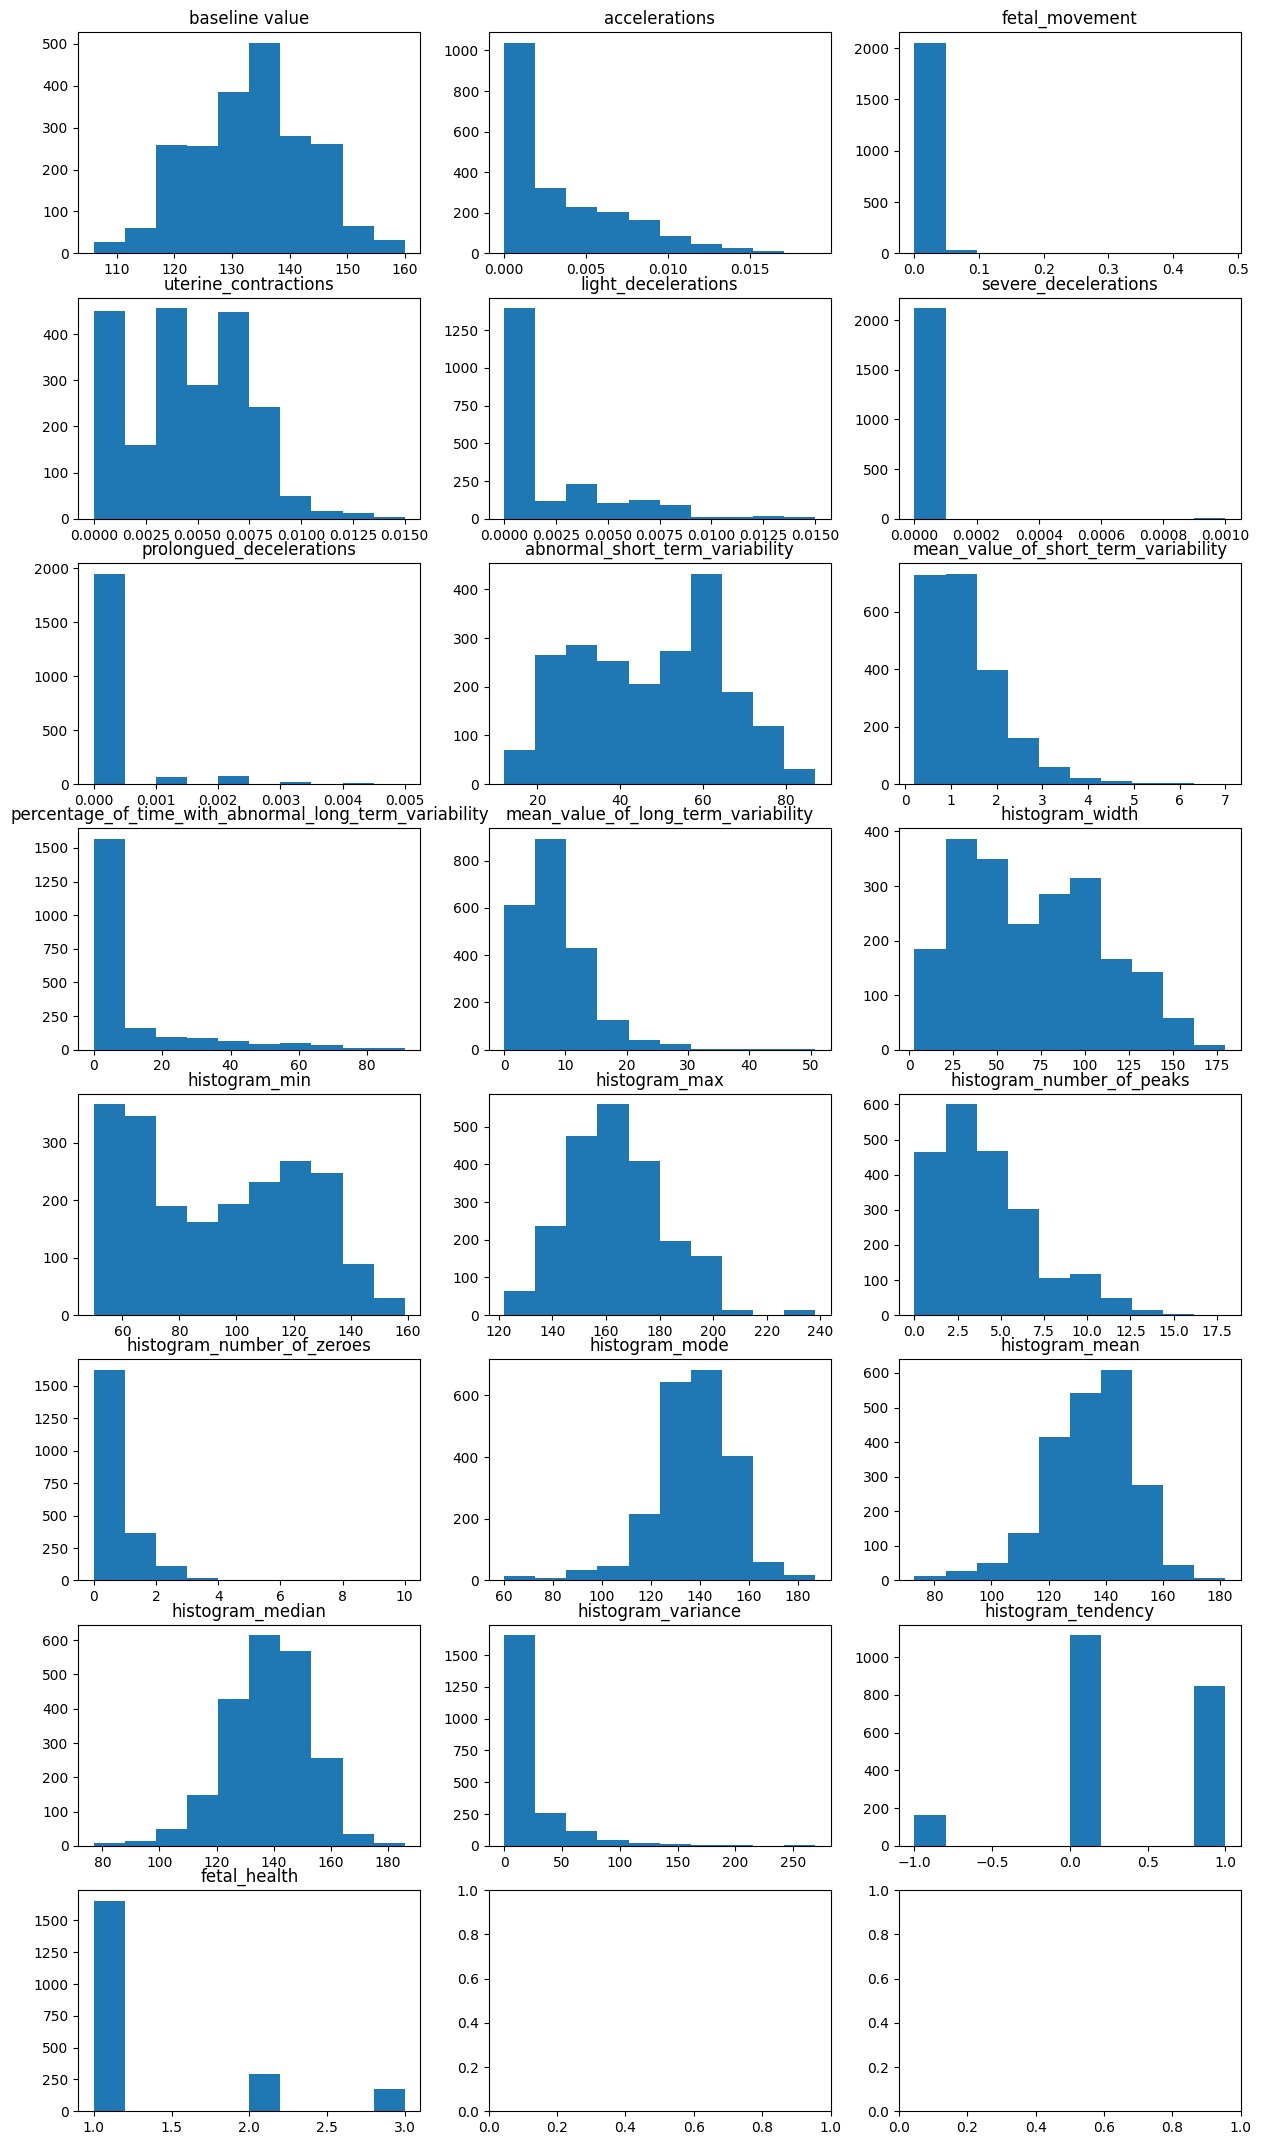

In [3]:
fig, ax = plt.subplots(8,3,figsize=(15,27))

for i, features in enumerate(df):

    ax[i//3][i%3].hist(df[features])
    ax[i//3][i%3].title.set_text(features)
plt.show()

#### 

### 4. Description of Technical Approach

##### Overview
&emsp;The main algorithms of our Machine Learning Project were KNN and Multilayer-Perceptron. The models created were designed to predict the health of fetuses and their mothers. The overall project is split into 2 sections to have one for each of the algorithms. Our models were designed with relative simplicity in mind, not only because of our limited hardware, but because we wanted the solution to be more usable by weaker computers (which would be more accessible to people who can't have a real diagnosis).

##### Dataset Processing
&emsp;The original dataset, directly obtained from Kaggle, contained 2126 datapoints with 21 distinct features. We decided that our models should be trained, tested, and evaluated on both the original dataset and a modified dataset that contained 2126 datapoints and 7 specific features. We created the modified dataset because we thought that would reduce unnecessary noise and decrease training times. Furthermore, the 7 features we chose (Baseline Fetal Heart Rate, Number of Accelerations per seconds, Number of Fetal movements per seconds, Number of Uterine Contractions per seconds, Number of Light Decelerations per seconds, Number of Severe Deceleration per seconds, Number of Prolonged Deceleration per seconds) were what we thought was most relevant, since they seemed to be actual recordings of the subject, unlike the other features which seemed more statistical in nature. 

##### Cross Validation
&emsp;Our original vision for the project was to train our models and test them using a classic 80/20 split of the dataset. However, as our research went on, we decided that doing cross-validation was in our best interest since that would more closely reflect how our models would behave with "from the wild" data. Given an value 'x' for N-folds, the dataset would be split up into 'x' even segments. One segment would be saved for to evaluate, while the rest was used for training. This would be repeated 'x' times, generating 'x' evaluations. An average of the evaluations is taken to evaluate the model as a whole. When we did utilize cross validation, we stuck with N-folds = 5.

<!-- <p style="text-align: center"><img src="src\pictures\g4raa1gr.bmp"></img></p> for some reason, this messes up headers???-->
##### KNN
&emsp;Our KNN algorithm was imported from the sklearn module, and was implemented using the standard Euclidian distance for the distance metric. To test for the best values of KNN, we trained models using k values between 1-100 or 1-250. The differing ranges are because we wanted to save time and knew that the optimal k values would show up within 100 after a few rounds of testing. We tested KNN with/without the cross validation and with the small and original datasets.In total, there were 4 variations of KNN we tested: small dataset/no cross validation,small dataset/cross validation, original dataset/no cross validation,original dataset/cross validation. After finding a best 'k' value for a variation, we ran metrics on a KNN classifier initilized with that k value.
<br><p style="text-align: center"><img src="src\pictures\08rnt21i.bmp"></img></p>

##### MLP
&emsp;Our MLP models were implemented using the keras package from the tensorflow module. The architechture of the NN models (a hidden layer with 150 HU using ReLU a hidden layer of 75 HU using ReLU, and a output layer using softmax) stayed the same, but the parameters and data given to the models were changed for better understanding of their effects. The models ran with an "Adam" optimizer with loss set to 'sparse_categorical_crossentropy'. Our research showed that the these parameters would be ideal for our type of classification problem. Earlier attempts were made using SGD as our optimizer, but those failed miserably since they would only guess one label per epoch.
<br><p style="text-align: center"><img src="src\pictures\3a3mj3bg.bmp"></img></p>

## 5.Software
##### Code we wrote:
-<b>Dataset Importing and Handling</b>: Using tools from imported libraries, we created numpy arrays to contain the data from the csv file. A seperate dataset called 'short_df' was created for further testing.
<br>
-<b>KNN Sections</b>: Using tools from imported libraries, we created KNN models over a wide range of k values. Each of these models were trained, and their error rates were recorded. After the most optimal k value was found for a certain experiment, we observed its accuracy, F1 score, and created a confusion matrix to understand where its predictions were made.
<br>
-<b>MLP Sections</b>: Using tools from imported libraries, we created NN models with the same architecture, but with other differing parameters or data. This meant observing some combination using the short/original datasets and vanilla NN or using class weights, or using a rebalanced dataset. We again observed accuracy,F1 scores, and a confusion matrix.

##### Code others wrote:
-<b>Cross Validation Function</b>: The cross validation function we used to create the cross validation splits was borrowed from the code of 184's HW2. Given a dataset, its labels, total number of folds and the current fold iteration, it would return a training and validation set. <br>
-<b>Imported Libraries</b>: Most of the project was doable thanks to the work and coordination between the libraries imported for this project. The libraries include sklearn, numpy, pandas, tensorflow, and imblearn.

## 6.Experiments and Evaluations
##### KNN Setup
&emsp;For the experiments involving KNN, our focus were on the effects of two specific variables: what we included in our dataset and cross-validation v.s. an 80/20 test split when evaluating the models. 
<br>
&emsp;Our dataset orignally had 21 features, but seeing as how many of the features were statistical in nature, our group created a shorter dataset containing only 7 features. These features were more direct recordings of the subject. And as for the cross-validation v.s. an 80/20 test split, we wanted to see how our results and metrics would be affected since cross-validation should more accurately represent handling "data from the wild."
<br>
&emsp;This means that there were 4 KNN experiments to look at: small dataset with no cross validation,small dataset with cross validation, original dataset with no cross validation and original dataset with cross validation. The accuracy and f1 score of each experiment's best was taken using a 80/20 split of the data.
<br>
<b>KNN:Small Dataset without Cross Validation</b>
<p style="text-align: center"><img src="src\pictures\2nnConfusionMatrix.png" style="margin:auto"/><br>KNN k = 2, with 7 features</p>
&emsp;First comes our KNN models that were trained using the short dataset and no cross validation (80/20 split used instead). The best model used k=2, landed an accuracy of ~87 percent, with an F1 score of 0.861.  This model served as a good baseline to compare against other models. Although we did test for higher k values, we understood that our the most optimal k values would be relatively low for the KNN experiments based on this experiment.
<br>
<b>KNN:Small Dataset with Cross Validation</b>
<p style="text-align: center"><img src="src\pictures\52nnConfusionMatrix.png" style="margin:auto"/><br>KNN k = 52, with 7 features</p>
&emsp;At an optimal k of 52, the best model had an accuracy of ~.79 and an F1 score of .718. After seeing the first experiment, we were a little surprised to see the jump in k value. Most of the predictions were class 0, which makes since we have a moderately high k value in a largely unbalanced dataset.
<br>
<b>KNN:Original Dataset without Cross Validation</b>
<p style="text-align: center"><img src="src\pictures\3nnConfusionMatrix.png" style="margin:auto"/><br>KNN k = 3, with 21 features</p>
&emsp;This KNN experiment was the most surprising. With an accuracy of ~92 percent and an F1 score of .914, the most optiaml k value was k=3. The experiment made clear to us that our hypothesis about a shorter dataset being more effective wasn't necessarily true, and that the statistical data was of more use than originally thought.
<br>
<b>KNN:Original Dataset with Cross Validation</b>
<p style="text-align: center"><img src="src\pictures\7nnConfusionMatrix.png" style="margin:auto"/><br>KNN k = 7, with 21 features</p>
&emsp;At an optimal k of 7, this KNN  experiment landed an accuracy of ~.892 and an F1 score of 0.887. Unfortunately, this instance did see an increase to the false classifications for both the suspect and pathological labels. We think that cross-validation could've accounted for the datapoints that couldn't be accurately represented through the 80/20 split.

##### MLP Setup
&emsp;Unlike our KNN experiments, our MLP experiments didn't test for cross validation vs 80/20 split. Instead, we stuck with cross validation training and testing for all MLP tests, because it would be the more accurate representation. The experiments did test the differences of the short and original dataset. After that, we experimented with class weights and using Synthetic Minority Over-Sampling (SMOTE) to try and improve the results.
<br>
<b>MLP with short dataset</b>
<p style="text-align: center"><img src="src\pictures\MLP_shortDataset.png" style="margin:auto"/><br>MLP with short dataset</p>
&emsp;We were hoping that our hypothesis would prove true for MLP especially since it didn't work for KNN. However, it didn't prove to be true at all. The MLP model, when trained on the short dataset, yielded an average accuracy of ~78 precent and an average f1 score of .689. Looking at the confusion matrix, it's clear that this model is next to useless, since it's only guessing label 0.
<br>
<b>MLP with original dataset</b>
<p style="text-align: center"><img src="src\pictures\MLP_originalDataset.png" style="margin:auto"/><br>MLP with original dataset</p>
&emsp;With the short dataset being an absolute failure for the MLP, we went back to the original dataset. It yielded an average of ~82 percent and a f1 score of .803. While this experiment is significantly better than the previous one, it still pales in comparison to KNN experiments.
<br>
<b>MLP with class weights and original dataset</b>
<p style="text-align: center"><img src="src\pictures\MLP_classWeights.png" style="margin:auto"/><br>MLP with class weights and original dataset</p>
&emsp;Since the original dataset provided so much more predicting power, it made sense to ditch the short dataset altogether. That being said, it still wasn't as accurate with the other classes as we hoped. One hypothesis was that the heavy class imbalance was what caused the issue. So we introduced class weights using the inverse class frequency method which was then provided as a parameter to the model's "fit" function. It achieved an average accuracy of ~75 percent and a average f1 score of .781. The matrix shows that the models started predicting the other classes a little too much. With further research into better formulas for class weights, this may have been a decent option.
<br>
<b>MLP with SMOTE</b>
<p style="text-align: center"><img src="src\pictures\MLP_SMOTE.png" style="margin:auto"/><br>MLP with SMOTE and original dataset</p>
&emsp;Instead of training the model's differently, we thought to change the dataset. For each fold of the cross validation, the training split would be given to the smoteMachine, which would then rebalance the dataset by synthetically creating more samples of the minority classes. The models were then trained on that modified dataset, and evaluated. The average accuracy for this experiment was ~74 percent and an average f1 score of .769.

## 7.Discussion and Conclusion
<b>A problem with the MLP experiments</b> - For every epoch they were trained, the models would only guess a specific label for every testing datapoint. We still don't entirely understand why, but the reason was because we used the SGD optimizer. Once the optimizer was switched to "Adam", the models started predicting other labels.
<br><br>
<b>KNN effectiveness</b> - Part of our group had thought that KNN would perform much better with the shorter dataset than the original dataset (7 vs 21) since KNN is known to deteriorate in quality as dimensions grow. The other part of our group had correctly guessed that the increase in dimensionality wasn't significant enough to cause predictions to deteriorate.
<br><br>
<b>Major limitations</b> - Our goal with the project was to create low-cost models that could accurately predict the health of fetuses and their mothers, but seeing that the problem may be more intricately complex means that more powerful models may be needed. If we were to take this project from a different perspective, we may start with much more complex and accurate models and then work to reduce the power.
<br><br>
<b>Short Dataset failure</b> - Though the use of the short dataset theoretically made sense to us (for a reduction in dimensionality and noise), it failed in every practical usage in these experiments. If we wanted to take this idea further, we could start including more columns one by one or by batches to see if any reduction in the dataset would lead to better predictions.
<br><br>

## 8.Individual Contributions

<b>Sharvin</b><br>
&emsp; These are my contributions to the project. I started by setting up the github repo page and I researched the libaries we'd need for the project. After that, I imported, modified, and handled the data for later use. I helped in implementing the KNN experiments, and implemented MLP. Finally, I took the results and helped write and revise the final project report.
<br>
<b>Jeffery</b><br>
&emsp; I started the final report notebook, wrote the introduction, related work, and dataset part with some code to present the structure of the data. I worked on the code for KNN training to implement cross-validation and I helped writing the KNN portion of the technical approach and analysis. I helped with a small portion of the MLP technical approach and pitched in on some ideas for dealing with class imbalance issues.